### Corona Cases Forecasting for Germany on a County Level

##### Get data:
Corona cases by County in Germany:

GEN                   | NUTS  | cases | deaths | county
--------------------- | ----- | ----- | ------ | ----------
Flensburg             | DEF06 | 21    | 0      |  SK Flensburg <br>
Herzogtum Lauenburg   | DEF07 | 15    | 0      |  LK Herzogtum Lauenburg

In [193]:
import pandas as pd 
data = pd.read_csv("data/RKI_Corona_Landkreise.csv") 
data.head(2)
#data.describe()

,OBJECTID,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,...,Shape__Area,Shape__Length,death_rate,cases,deaths,cases_per_100k,cases_per_population,BL,BL_ID,county
0,1,4.0,4.0,1.0,1001,1001.0,1.001000e+10,Flensburg,Kreisfreie Stadt,40.0,...,4.918293e+07,42752.592015,0.0,12,0,13.407222,0.013407,Schleswig-Holstein,1,SK Flensburg
1,2,4.0,4.0,1.0,1002,1002.0,1.002000e+10,Kiel,Kreisfreie Stadt,40.0,...,1.122314e+08,104373.457289,0.0,36,0,14.542634,0.014543,Schleswig-Holstein,1,SK Kiel


##### Get additional information about the Counties:
e.g. population density, public transport information, gender distribution, age distribution

### Visualize data based on county:
How to: https://www.kdnuggets.com/2020/01/open-data-germany-maps-viz.html

In [13]:
import geopandas as gpd
import descartes # to plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

#### Load county shape information
most important: cca_2 (= county identifier) and geometry:

name_2                   | cca_2  | geometry
------------------------ | ------ | -------------------------------------------------
Freiburg im Breisgau     | 08311  | POLYGON ((7.790447235107478 47.96881103515624,...
Dillingen an der Donau   | 09773  | POLYGON ((10.6144847869873 48.75083541870145, ...


In [196]:
county_df = gpd.read_file('data/landkreise-in-germany.shp', encoding='utf-8', dtype={'cca_2': str})
county_df.head(2)

,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry
0,86.0,DEU,Germany,1.0,Baden-Württemberg,12.0,Freiburg im Breisgau,DE.BW.FB,0.0,08311,Stadtkreis,District,None,None,"POLYGON ((7.790447235107478 47.96881103515624,..."
1,86.0,DEU,Germany,2.0,Bayern,68.0,Dillingen an der Donau,DE.BY.DD,0.0,09773,Landkreis,District,None,None,"POLYGON ((10.6144847869873 48.75083541870145, ..."


In [197]:
plt.rcParams['figure.figsize'] = [16, 11]
# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

# Color by state (= first two numbers in cca_2):
county_df = county_df \
    .assign(first_dig_cca_2 = lambda x: x['cca_2'].str.slice(start=0, stop=2))

# convert first digits of cca_2 to float
county_df = county_df.astype({'first_dig_cca_2': 'float64'})

# kick non numeric cca_2 value:
county_df = county_df.drop(county_df.loc[county_df['first_dig_cca_2'].isna()].index)

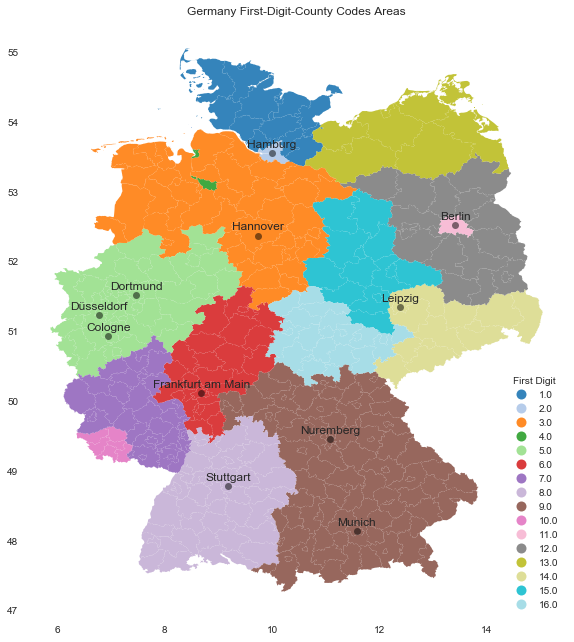

In [199]:
fig, ax = plt.subplots()

county_df.plot(
    ax=ax, 
    column='first_dig_cca_2', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-County Codes Areas', 
    aspect=1.3,
    facecolor='white'
);